# Assignment 1
## Jan Super, Remco Spelthan

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('a1_data.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796


array([%lt;AxesSubplot:title={'center':'A'}%gt;,
 %lt;AxesSubplot:title={'center':'B'}%gt;,
 %lt;AxesSubplot:title={'center':'C'}%gt;,
 %lt;AxesSubplot:title={'center':'D'}%gt;,
 %lt;AxesSubplot:title={'center':'E'}%gt;,
 %lt;AxesSubplot:title={'center':'F'}%gt;,
 %lt;AxesSubplot:title={'center':'G'}%gt;,
 %lt;AxesSubplot:title={'center':'H'}%gt;,
 %lt;AxesSubplot:title={'center':'I'}%gt;,
 %lt;AxesSubplot:title={'center':'J'}%gt;,
 %lt;AxesSubplot:title={'center':'K'}%gt;], dtype=object)

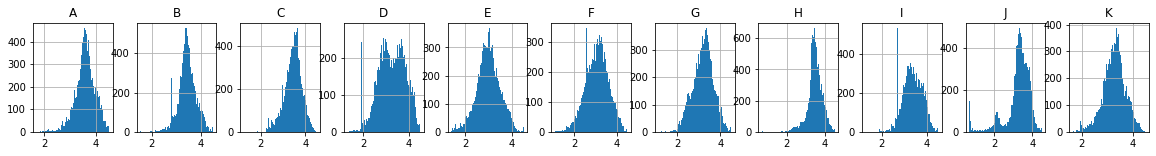

In [24]:
fig, axis = plt.subplots(1,11,figsize=(20, 2))
df.hist(ax=axis, bins = 100)

# Assumptions
There is a true causal effect: We assume that there is a causal relationship between the variables of interest. This means that changes in one variable actually cause changes in another variable.\
\
No confounding: We assume that there are no other factors that influence both the independent and dependent variables. In other words, there are no other variables that explain the relationship between the two variables of interest.\
\
Independence: We assume that the independent variable is not influenced by the dependent variable, and vice versa. This means that there is no reverse causation or feedback loops in the relationship.\
\
Stability: We assume that the relationship between the variables is stable over time and across different contexts.\
\
Normality: We assume that the residuals (the differences between the actual values and the predicted values) are normally distributed.\
\
No measurement error: We assume that the variables are measured without error, or that any measurement error is independent of the true value of the variable.

To estimate the DAG we follow Park's algorithm.

# DAG's
DAG1: X -> Y \
X are the covariates and Y the response. 

DAG2: X, Y \
No connection between variables

DAG1 encapsulates all relationships between a given feature and another feature when they have a one way relation.
DAG2 encapsulates all relationships between given features that are independent.
# Procedure
Check if the correlation between X and Y is zero using a Pearson’s correlation test. If it is zero, print DAG2 (independent variables).
If the correlation is non-zero, use an F-test for normal distribution to compare the variances of X and Y.
Meaning that: $Y = \epsilon_{1}$, $X = \epsilon_{2}$

If Var(Y) > Var(X), print DAG1 (X influences Y).
Meaning that: $Y = \beta_{1} * X + \epsilon_{1}$ \
Else, swap around the X and Y and run the same test to denote the other combination as DAG1.

# Implementation

In [44]:
from scipy.stats import pearsonr

list1 = list(df.columns)
list2 = list(df.columns)
related = []
for x in list1:
    for y in list2:
        corr, p_value = pearsonr(df[x], df[y])
        if p_value > 0.05:
            related.append([x,y])
            print(x,y)
    # list1.remove(x)

A F
A G
B E
C H
C I
D F
D G
D H
D I
D K
E B
E G
F A
F D
F K
G A
G D
G E
G I
H C
H D
I C
I D
I G
K D
K F


In [65]:
import numpy as np
from scipy.stats import norm

list1 = list(df.columns)
list2 = list(df.columns)

fail_to_reject = []

for x in list1:
    for y in list2:
        # compute the Pearson correlation coefficient between 'x' and 'y'
        corr_coef = df[x].corr(df[y])

        # compute the standard error of the correlation coefficient
        n = len(df)
        standard_error = 1/np.sqrt(n-3)

        # compute the z-score
        z_score = corr_coef/standard_error

        # compute the p-value using the standard normal distribution
        p_value = norm.sf(abs(z_score))*2

        # set the significance level
        alpha = 0.05
        # compare the z-score to the critical value
        z_crit = norm.ppf(1 - alpha/2)
        if abs(z_score) > z_crit:
            pass
        else:
            #print('Fail to reject the null hypothesis')
            fail_to_reject.append([x,y])

        # print the z-score and p-value
        #print('Z-score:', z_score)
        #print('p-value:', p_value)


print(fail_to_reject)
print(related)

[['A', 'F'], ['A', 'G'], ['B', 'E'], ['C', 'H'], ['C', 'I'], ['D', 'F'], ['D', 'G'], ['D', 'H'], ['D', 'I'], ['D', 'K'], ['E', 'B'], ['E', 'G'], ['F', 'A'], ['F', 'D'], ['F', 'K'], ['G', 'A'], ['G', 'D'], ['G', 'E'], ['G', 'I'], ['H', 'C'], ['H', 'D'], ['I', 'C'], ['I', 'D'], ['I', 'G'], ['K', 'D'], ['K', 'F']]
[['A', 'F'], ['A', 'G'], ['B', 'E'], ['C', 'H'], ['C', 'I'], ['D', 'F'], ['D', 'G'], ['D', 'H'], ['D', 'I'], ['D', 'K'], ['E', 'B'], ['E', 'G'], ['F', 'A'], ['F', 'D'], ['F', 'K'], ['G', 'A'], ['G', 'D'], ['G', 'E'], ['G', 'I'], ['H', 'C'], ['H', 'D'], ['I', 'C'], ['I', 'D'], ['I', 'G'], ['K', 'D'], ['K', 'F']]


For the sake of providing examples two ways of finding out which DAG applies were implemented

In [70]:
from scipy.stats import f
list1 = list(df.columns)
list2 = list(df.columns)

order = []

for x in list1:
    for y in list2:
        bruh = False
        for combo in fail_to_reject:
            if set([x,y]).issubset(set(combo)):
                bruh = True
        if not bruh:
            # compute the variances of 'x' and 'y'
            var_x = df[x].var(ddof=1)
            var_y = df[y].var(ddof=1)

            # compute the F-statistic and p-value
            f_stat = var_x/var_y
            df1 = len(df[x])-1
            df2 = len(df[y])-1
            p_value = f.sf(f_stat, df1, df2)

            # set the significance level
            alpha = 0.05

            # compare the p-value to the significance level
            if p_value < alpha:
                #print('Reject the null hypothesis')
                order.append([x,y])
print(order)

[['A', 'B'], ['C', 'A'], ['C', 'B'], ['D', 'A'], ['D', 'B'], ['D', 'C'], ['D', 'E'], ['E', 'A'], ['E', 'C'], ['E', 'H'], ['E', 'I'], ['E', 'K'], ['F', 'B'], ['F', 'C'], ['F', 'E'], ['F', 'G'], ['F', 'H'], ['F', 'I'], ['G', 'B'], ['G', 'C'], ['G', 'H'], ['G', 'K'], ['H', 'B'], ['I', 'A'], ['I', 'B'], ['I', 'H'], ['J', 'A'], ['J', 'B'], ['J', 'C'], ['J', 'D'], ['J', 'E'], ['J', 'F'], ['J', 'G'], ['J', 'H'], ['J', 'I'], ['J', 'K'], ['K', 'A'], ['K', 'B'], ['K', 'C'], ['K', 'H']]


# Limitations

## Statistical
Park's algorithm assumes that the relationships between variables are linear and additive. This means that the algorithm may not be able to capture more complex relationships such as non-linear or interactive effects. As a result, the algorithm may fail to identify causal relationships in situations where non-linear or interactive effects are present.

Park's algorithm assumes that there are no unmeasured confounding variables that are related to both the cause and effect variables. This assumption, known as the "no unmeasured confounding" assumption, is a key assumption in causal inference, and violation of this assumption can lead to biased estimates of causal effects.

Park's algorithm assumes that the data is generated from a causal directed acyclic graph (DAG), which is a graph that represents the causal relationships between variables. This assumption may not hold in real-world data, where there may be feedback loops, cycles, or other complex causal structures.

Park's algorithm assumes that the data is independent and identically distributed (i.i.d.), which means that the observations are independent of each other and have the same distribution. This assumption may not hold in real-world data, where there may be temporal or spatial dependencies, or where the data is clustered or hierarchical.

Park's algorithm assumes that the data is free from measurement errors, missing data, and outliers. In practice, these issues can be common in real-world data, and can lead to biased estimates of causal effects if not properly addressed.

## Assumption violations
Correlation does not equal causation, this is obvious from the real world example of the rate of divorce in Maine having a 99%+ correlation to the margerine consumption per capita \href{https://www.bbc.com/news/magazine-27537142}. This obviously is not caused by one another, but would hold in the tests we ran.

No confounding assumption: A violation of this assumption could occur if there are other variables that influence both the independent and dependent variables. For example, the correlation between chocolate consumption and Noble laureates in https://www.sciencedirect.com/science/article/pii/S2590291120300711 indicates a correlation between these two variables. But this is not indicative of any causal relationship. But this would still hold in our tests.

A violation of the independence assumption of our independent variable could occur when we have a feedback loop, that influences the dependent variable, that in turn changes the independent variable, which changes the independent variable etc. An example of this is glucose and insulin cycle, in where both variables are constantly affecting eachother. https://www.medicalnewstoday.com/articles/316427

The stability assumption could be violated when the data is expanded to other populations or different contexts. This would in turn change the causal relationships between the variables. An example of this is overfitting on a training set, but not performing as well on the test dataset.

The normality assumption could be violated when the residuals between two variables are not normally distributed

The no measurement error assumption could be violated when the measurement of the independent variable is inprecise. This could lead to a biased estimate of the true effect.